**Using the Kaggle API to downlaod the necessary dataset**

In [1]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files("blastchar/telco-customer-churn", path=".", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


/Users/davideferreri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


**Addition commands using the kaggle API**

In [2]:
# Extracts a JSON file of the metadata for a given dataset
kaggle.api.dataset_metadata("blastchar/telco-customer-churn", path=".")

# List all the data files in a given dataset
print(kaggle.api.dataset_list_files("blastchar/telco-customer-churn").files)

# Provides a list of dataset that contain the search word(s)
datasets = kaggle.api.dataset_list(search="customer churn")
print(datasets)

[]
[blastchar/telco-customer-churn, barun2104/telecom-churn, radheshyamkollipara/bank-customer-churn, muhammadshahidazeem/customer-churn-dataset, gauravtopre/bank-customer-churn-dataset, shubhammeshram579/bank-customer-churn-prediction, shantanudhakadd/bank-customer-churn-prediction, anandshaw2001/customer-churn-dataset, rashadrmammadov/customer-churn-dataset, saurabhbadole/bank-customer-churn-prediction-dataset, mathchi/churn-for-bank-customers, abdullah0a/telecom-customer-churn-insights-for-analysis, santoshd3/bank-customers, divu2001/customer-churn-rate, abdallahwagih/telco-customer-churn, alfathterry/telco-customer-churn-11-1-3, mehmetsabrikunt/internet-service-churn, shilongzhuang/telecom-customer-churn-by-maven-analytics, tejashvi14/tour-travels-customer-churn-prediction, yeanzc/telco-customer-churn-ibm-dataset]


**Assign the dataset to the "data" variable so we can analyse it**

In [3]:
import pandas as pd

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Obtain information about the data set, each column (such as data types)** 

In [4]:
# To view all column names and their respective data types
data.columns
data.info()
data.describe() # Shows statistical summaries for all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Perform data cleaning**

**TotalCharges might be a string in some cases. Therefore, we need to convert it to numeric before training:**

In [5]:
# Convert following object type columns to numeric        
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [6]:
# Drop the "customerID" column since it does not provide any information therefore is not required 
data.drop(['customerID'], axis = 1, inplace = True)

# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It is clear to see that there are missing values in this datset, specifically in the "TotalCharges" feature 

We can either remove these rows with the missing data or impute the values for the missing rows using the mean. We will use both methods and see which results in the better performing models. 

In [7]:
# Creating a new dataframe by removing the rows containing missing values 
data_dropped = pd.DataFrame(data.dropna())
new_missing_values = data_dropped.isnull().sum()
new_missing_values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
unique_values1 = data_dropped.nunique(axis=0)
print(unique_values1)

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


**Based on the number of unique values of each feature, we need to encode the features so we can use them to train our ML algorithms**

**First we perform binary encoding on the features that only have 2 unique values**

**Then we perform One-Hot-Encoding on the features that 3 or more unique values**

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Features to encode
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
target_col = 'Churn'  # Keep target variable at the end

# Make a copy to avoid SettingWithCopyWarning
data_dropped = data_dropped.copy()

# Label Encoding for binary features
label_encoder = LabelEncoder()
for col in binary_cols:
    data_dropped[col] = label_encoder.fit_transform(data_dropped[col])

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(drop=None, sparse_output=False)  # drop='first' to avoid dummy variable trap
encoded_array = encoder.fit_transform(data_dropped[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(), index=data_dropped.index)

# Label Encode the target variable "Churn"
data_dropped[target_col] = label_encoder.fit_transform(data_dropped[target_col])

# Drop original categorical columns and concatenate encoded columns
df = pd.concat([data_dropped.drop(columns=categorical_cols), encoded_df], axis=1)

# Ensure the target variable is the last column
df = df[[col for col in df.columns if col != target_col] + [target_col]]

Perform some checks on the encoded data

In [10]:
# Check the First Few Rows (To Inspect Encoding)
print(df.head())

# Check the Data Types (To Ensure Encoding Didn’t Introduce Errors)
print(f"{df.dtypes} \n")

# Verify Unique Values in Encoded Columns
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

# Check the Shape of the DataFrame (To Ensure No Data Loss)
print(f"\nOriginal shape: {data_dropped.shape} \n")
print(f"Encoded shape: {df.shape} \n")

# Check for Any Missing Values (To Ensure No Data Was Removed)
print(f"Number of missing values: {df.isnull().sum().sum()} \n")  # Should be 0 if no data was lost

# Verify That Target Variable (Churn) Is Still the Last Column
print(f"The last column title is: {df.columns[-1]} \n")  # Should print "Churn"

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_No  ...  \
0                 1           29.85         29.85               0.0  ...   
1                 0           56.95       1889.50               1.0  ...   
2                 1           53.85        108.15               1.0  ...   
3                 0           42.30       1840.75               0.0  ...   
4                 1           70.70        151.65               1.0  ...   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  0.0               

**Now lets do some statistical analysis of the data**

<Axes: >

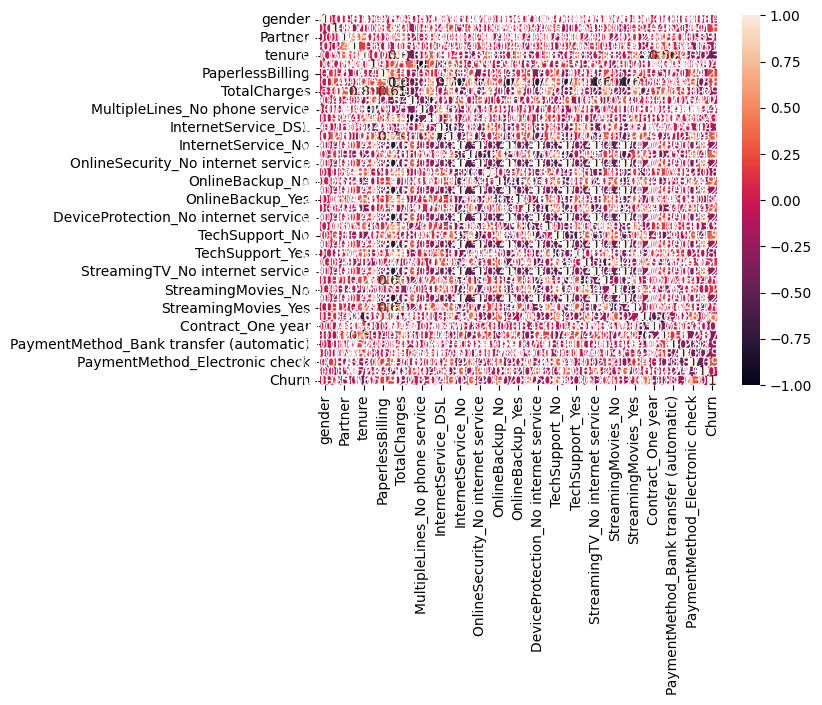

In [11]:
import seaborn as sns

# Plot heatmap using Seaborn to visualize correlation amongst ftrs.
sns.heatmap(df.corr(), annot = True)


Lets see what the correlation of each feature is to the target feature

In [12]:
# Print correlation between all features and target variable
correlation = df.corr()['Churn'].sort_values(ascending=False)

# Display the top correlated features (excluding 'Churn' itself)
top_correlated_features = correlation.iloc[1:11]  # Exclude 'Churn' itself
print(top_correlated_features)  # Show the top 10 correlated features

Contract_Month-to-month           0.404565
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
OnlineBackup_No                   0.267595
DeviceProtection_No               0.252056
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
SeniorCitizen                     0.150541
Name: Churn, dtype: float64


Plot the pairplots for the top 10 correlated features 

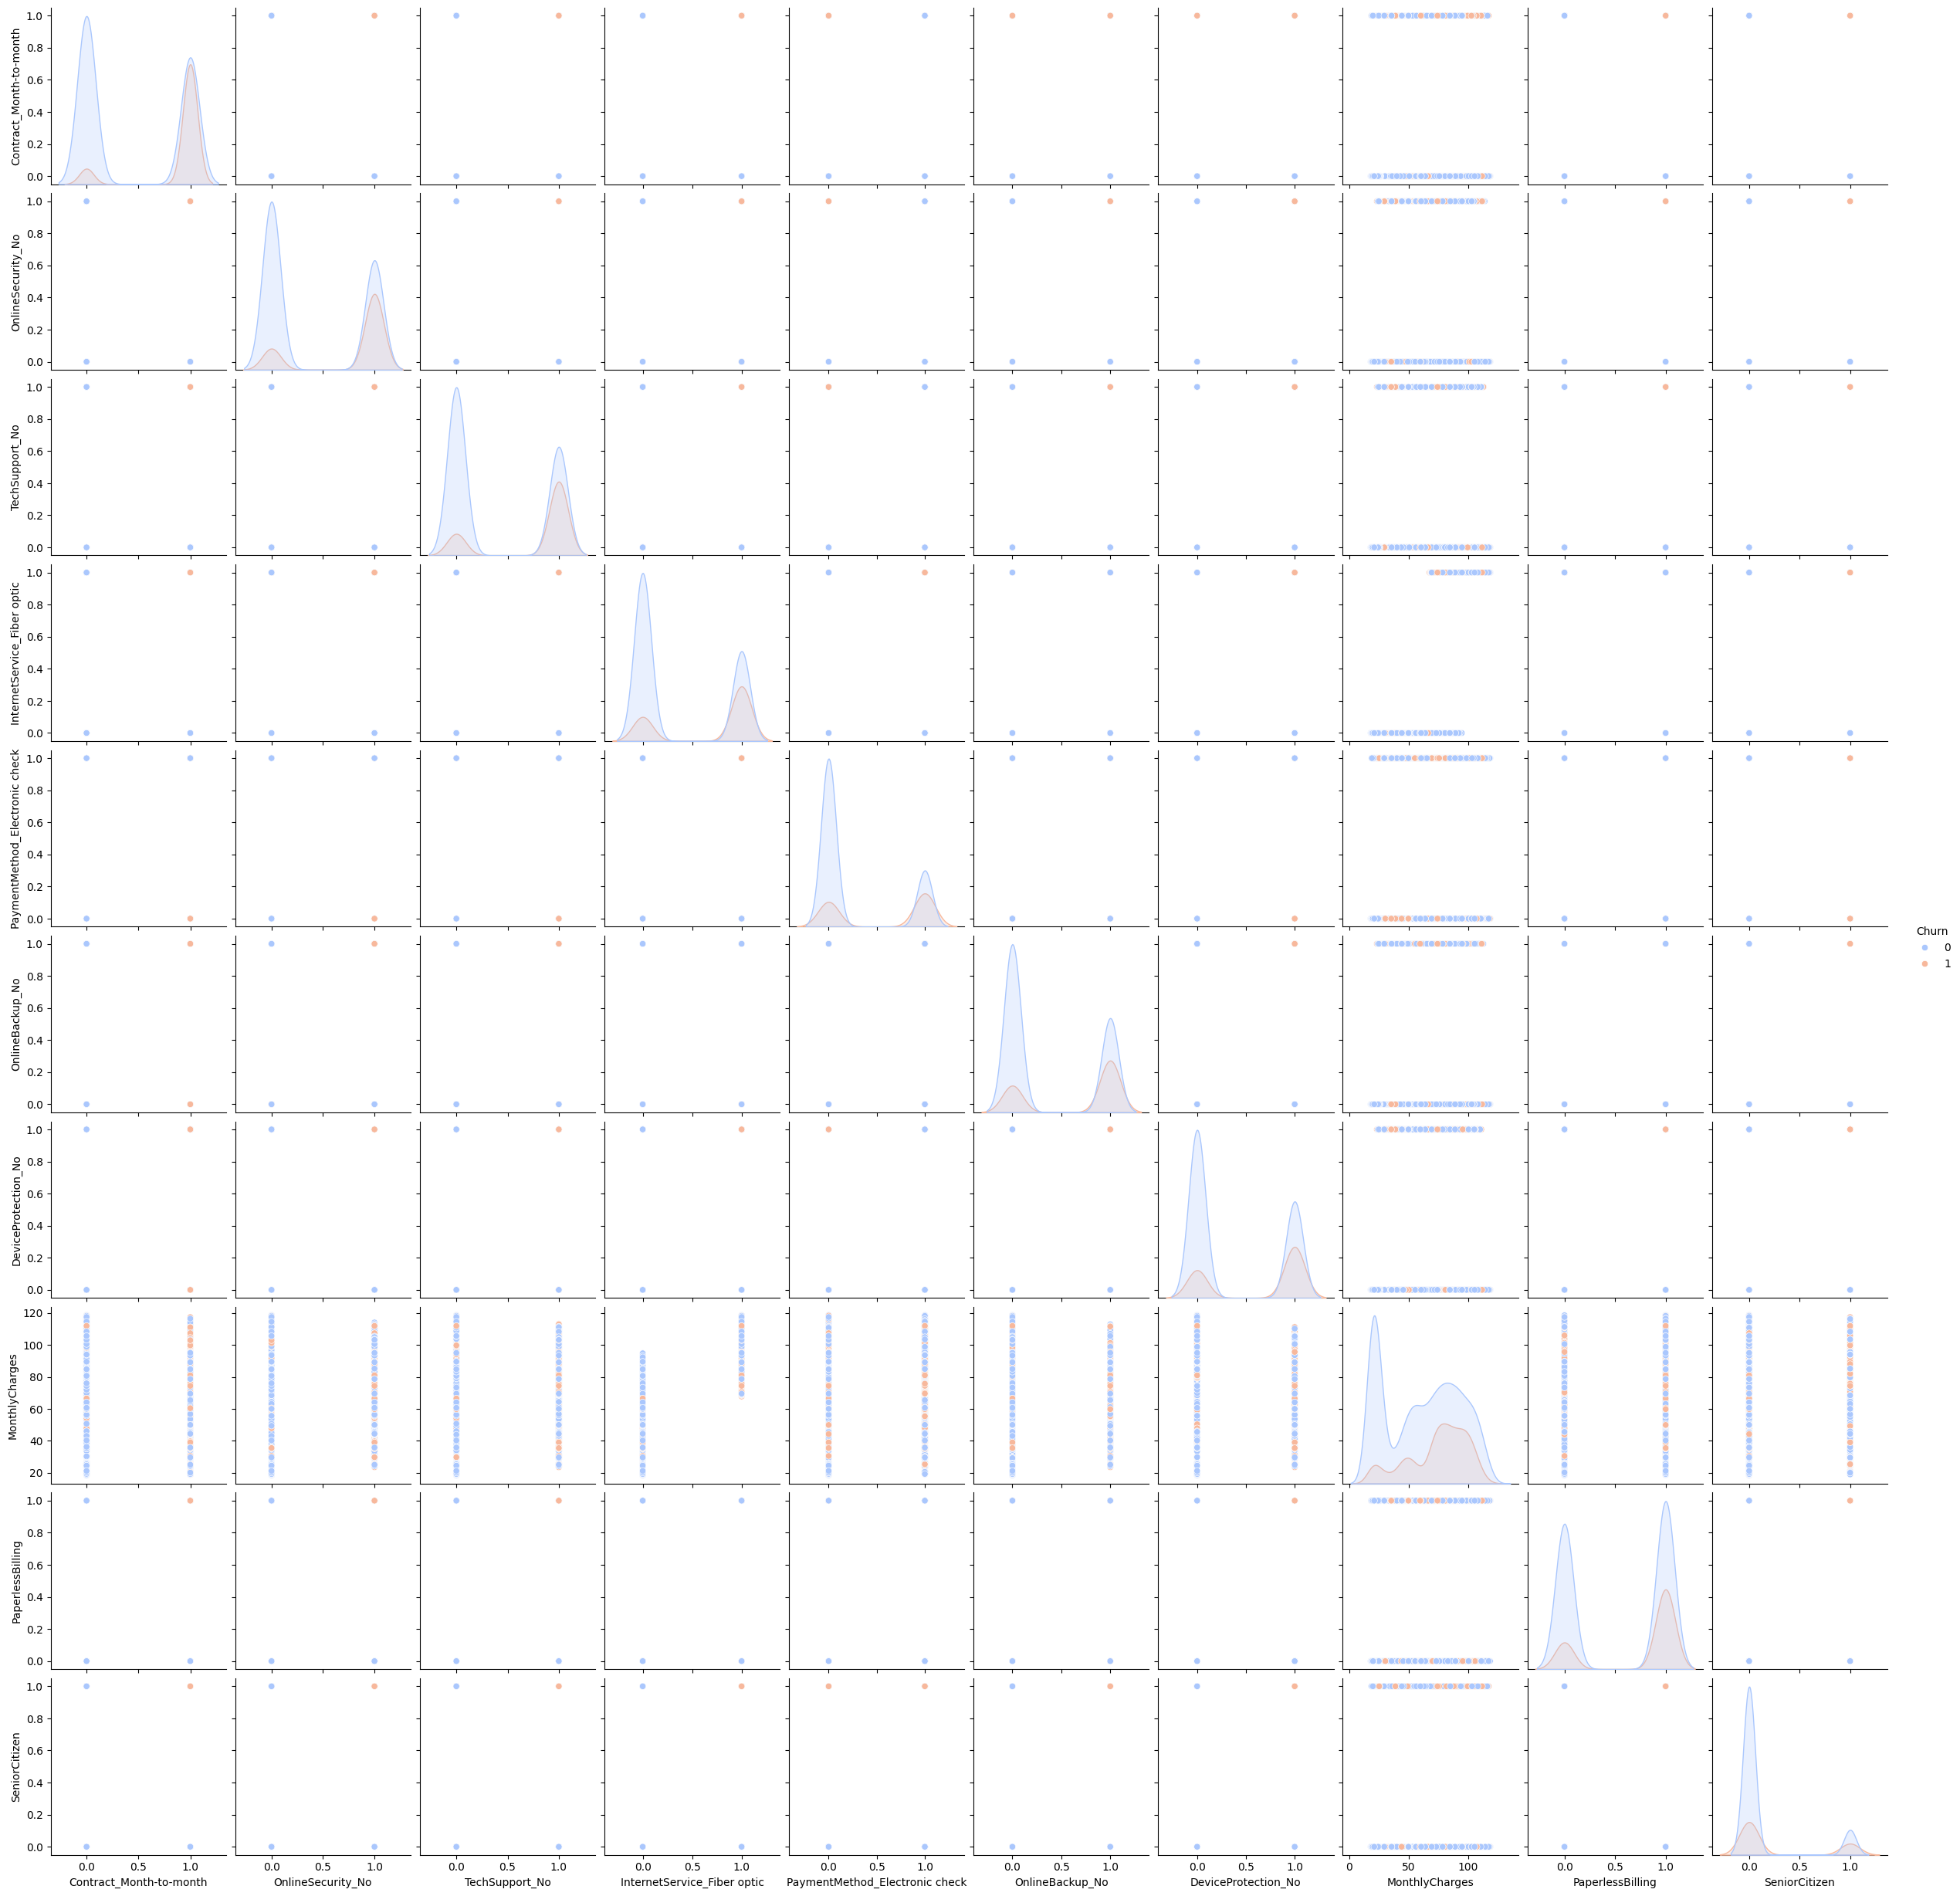

In [13]:
import matplotlib.pyplot as plt

# Select the top 10 correlated features + 'Churn' for plotting
selected_features = top_correlated_features.index.tolist() + ['Churn']

# Create pairplot
sns.pairplot(df[selected_features], hue='Churn', palette="coolwarm", diag_kind='kde')

# Show plot
plt.show()

**Prepare the data for machine learning algorithms**

Split the data into the descriptive features and target feature

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Split the data into training and testing data

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state=0)


Train and test the various machine learning algorithms and assess the metrics

In [16]:
from sklearn.metrics import accuracy_score, mean_squared_error as mse
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import warnings
from sklearn.exceptions import ConvergenceWarning
import pickle


# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Suppress XGBoost-specific warnings
warnings.filterwarnings("ignore", message=".*use_label_encoder.*")
# Suppress all warnings
warnings.filterwarnings("ignore")

# Classification using RBF SVM  
svm_rbf = SVC(kernel = "rbf")
svm_rbf = svm_rbf.fit(X_train,y_train)
# Save svm_rbf model using pickle
with open("svm_rbf_model.pkl", "wb") as f:
    pickle.dump(svm_rbf, f)

# Classification using Random Forest Classifier
rfc = RF(max_depth= 5, n_estimators= 10)
rfc = rfc.fit(X_train,y_train)
# Save rfc model using pickle
with open("rfc_model.pkl", "wb") as f:
    pickle.dump(rfc, f)

# Classification using Logistic Regression
logreg = LR(C = 1)
logreg = logreg.fit(X_train,y_train)
# Save logreg model using pickle
with open("logreg_model.pkl", "wb") as f:
    pickle.dump(logreg, f)

# Classification using Multi-layer perceptron 
ann = MLPClassifier(solver='lbfgs', alpha = 1e-5,
                    hidden_layer_sizes = (5, 2), random_state = 1)
ann = ann.fit(X_train, y_train)
# Save ann model using pickle
with open("ann_model.pkl", "wb") as f:
    pickle.dump(ann, f)


# Create the XGBoost classifier model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model = xgb_model.fit(X_train, y_train)
# Save svm_rbf model using pickle
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Make predictions and evaluate performance for the RBF SVM model
prediction = svm_rbf.predict(X_test)
print("Mean-squared error using SVM RBF:", mse(y_test, prediction))
print(f"Accuracy with SVM RBF:{accuracy_score(y_test, prediction)}\n")
# Make predictions and evaluate performance for the Random Forest Classifier model
prediction = rfc.predict(X_test)
print("Mean-squared error using Random Forest Classifier:", mse(y_test, prediction))
print(f"Accuracy with Random Forest Classifier: {accuracy_score(y_test, prediction)}\n")
# Make predictions and evaluate performance for the Logistic Regression model
prediction = logreg.predict(X_test)
print("Mean-squared error using Logistic Regression:", mse(y_test, prediction))
print(f"Accuracy with Logistic Regression: {accuracy_score(y_test, prediction)}\n")
# Make predictions and evaluate performance for the Multi layer perceptron model
prediction = ann.predict(X_test)
print("Mean-squared error using Neural networks MLP:", mse(y_test, prediction))
print(f"Accuracy with Neural networks MLP: {accuracy_score(y_test, prediction)}\n")
# Make predictions and evaluate performance for the XGBoost model
prediction_xgb = xgb_model.predict(X_test)
print("Mean-squared error using XGBoost:", mse(y_test, prediction_xgb))
print(f"Accuracy with XGBoost: {accuracy_score(y_test, prediction_xgb)}")


Mean-squared error using SVM RBF: 0.2622601279317697
Accuracy with SVM RBF:0.7377398720682303

Mean-squared error using Random Forest Classifier: 0.2082444918265814
Accuracy with Random Forest Classifier: 0.7917555081734187

Mean-squared error using Logistic Regression: 0.19402985074626866
Accuracy with Logistic Regression: 0.8059701492537313

Mean-squared error using Neural networks MLP: 0.23667377398720682
Accuracy with Neural networks MLP: 0.7633262260127932

Mean-squared error using XGBoost: 0.20184790334044064
Accuracy with XGBoost: 0.7981520966595593
